In [1]:
## ARIMA MODEL

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('datos/shampoo.csv',header=0,parse_dates=[0])

In [6]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
df.shape

(36, 2)

<AxesSubplot:>

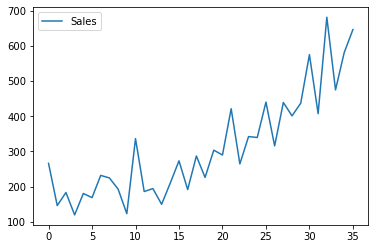

In [8]:
df.plot()
#df['Sales'].plot

In [9]:
#Dickey- Fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log 
result = adfuller(df.Sales.dropna())
print("ADF Statistic: %f"% result[0])
print("p-value: %f"% result[1])

ADF Statistic: 3.060142
p-value: 1.000000


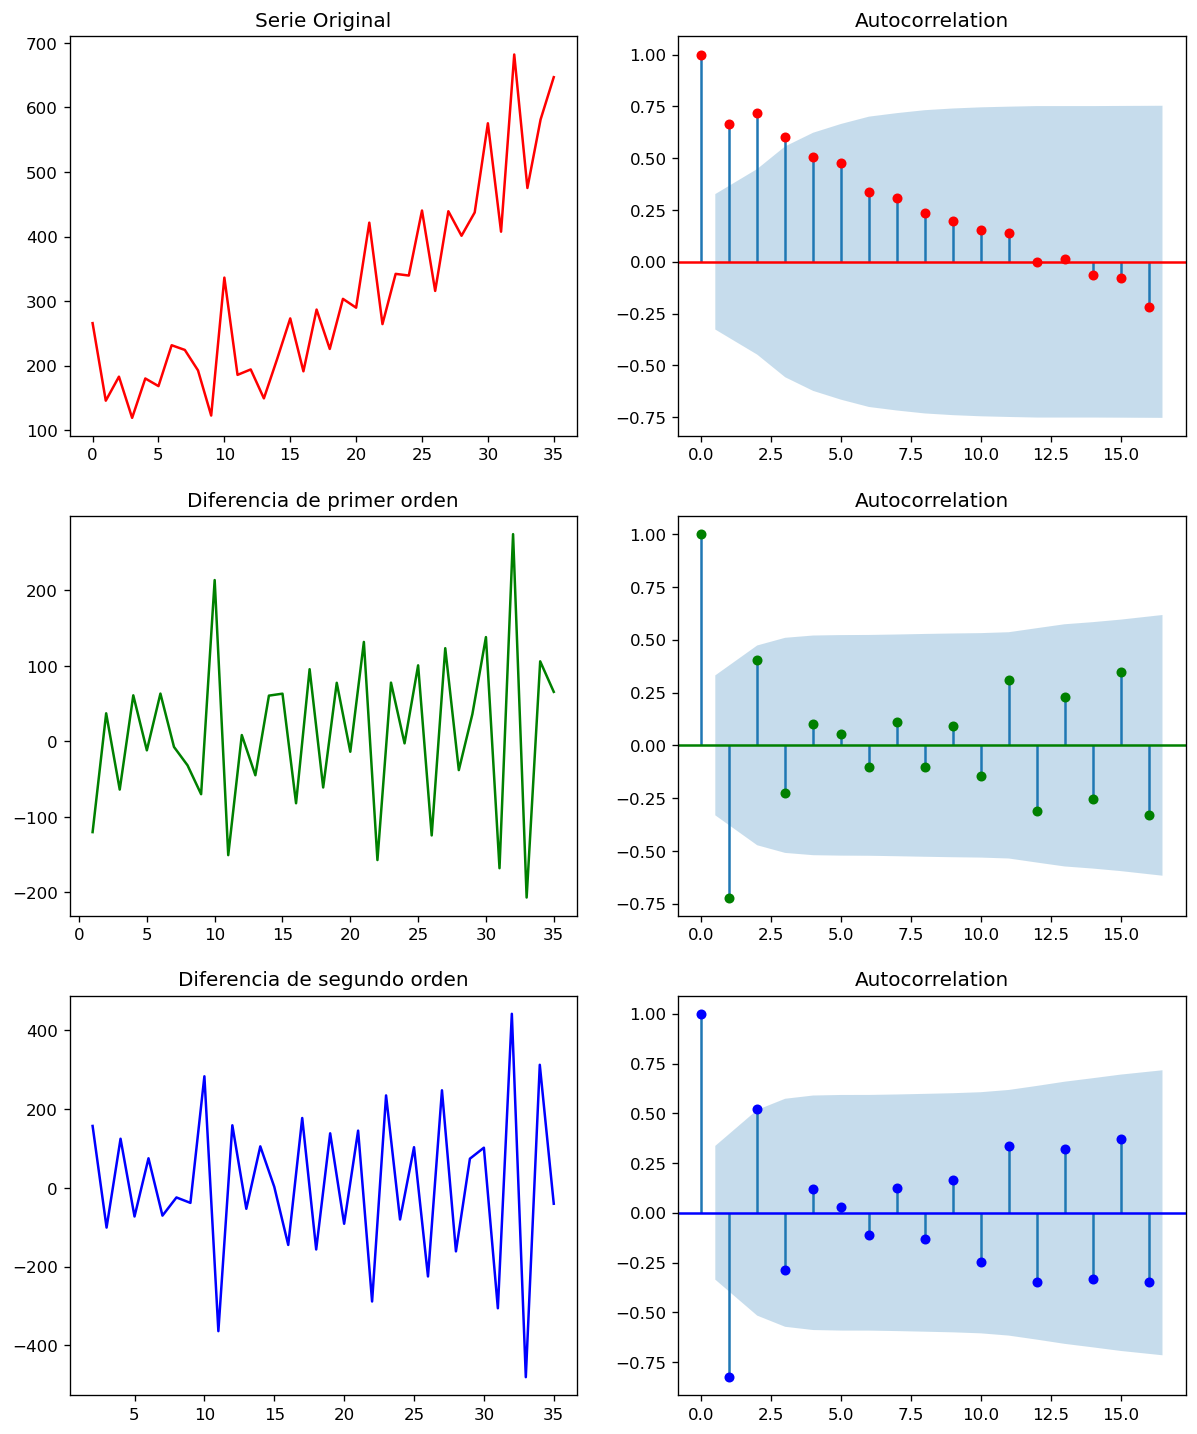

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
fig, axes = plt.subplots(3,2, sharex=False)
axes[0,0].plot(df.Sales,color='r'); axes[0,0].set_title('Serie Original')
plot_acf(df.Sales,ax=axes[0,1],color='r')

axes[1,0].plot(df.Sales.diff(),color='g'); axes[1,0].set_title('Diferencia de primer orden')
plot_acf(df.Sales.diff().dropna(),ax=axes[1,1],color="g")

axes[2,0].plot(df.Sales.diff().diff(),color='b'); axes[2,0].set_title('Diferencia de segundo orden')
plot_acf(df.Sales.diff().diff().dropna(),ax=axes[2,1],color='b')

plt.show()


In [11]:
#Dickey- Fuller
#Existe estacionaliriedad
from statsmodels.tsa.stattools import adfuller
from numpy import log 
result = adfuller(df.Sales.diff().dropna())
print("ADF Statistic: %f"% result[0])
print("p-value: %f"% result[1])

ADF Statistic: -7.249074
p-value: 0.000000


In [12]:
#Dickey- Fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log 
result = adfuller(df.Sales.diff().diff().dropna())
print("ADF Statistic: %f"% result[0])
print("p-value: %f"% result[1])

ADF Statistic: -3.715053
p-value: 0.003906


In [13]:
#Diferenciacion
d = 1 

In [14]:
#Order Del autor
p = 1

In [15]:
#Orden del termino MA
q=1

In [16]:
from statsmodels.tsa.arima_model import ARIMA

#Arima model
# p - d - q
model1 = ARIMA(df.Sales, order=(1,1,1))
model1_fit1 = model1.fit(disp=0)
print(model1_fit1.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Mon, 06 Dec 2021   AIC                            402.467
Time:                        12:41:19   BIC                            408.688
Sample:                             1   HQIC                           404.614
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.Sales    -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.Sales    -0.5133      0.155     

C:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
#Verificar el modelo
#H0 Ruido blanco > 0.05 el modelo no se ajusta bien y existe ruido blanco
#H1 No hay ruido blanco < 0.05 el modelo no se ajusta bien y por lo tanto no existe ruido blanco
#En este caso se ajusta bien
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model1_fit1.resid,lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,5.196555,0.877667


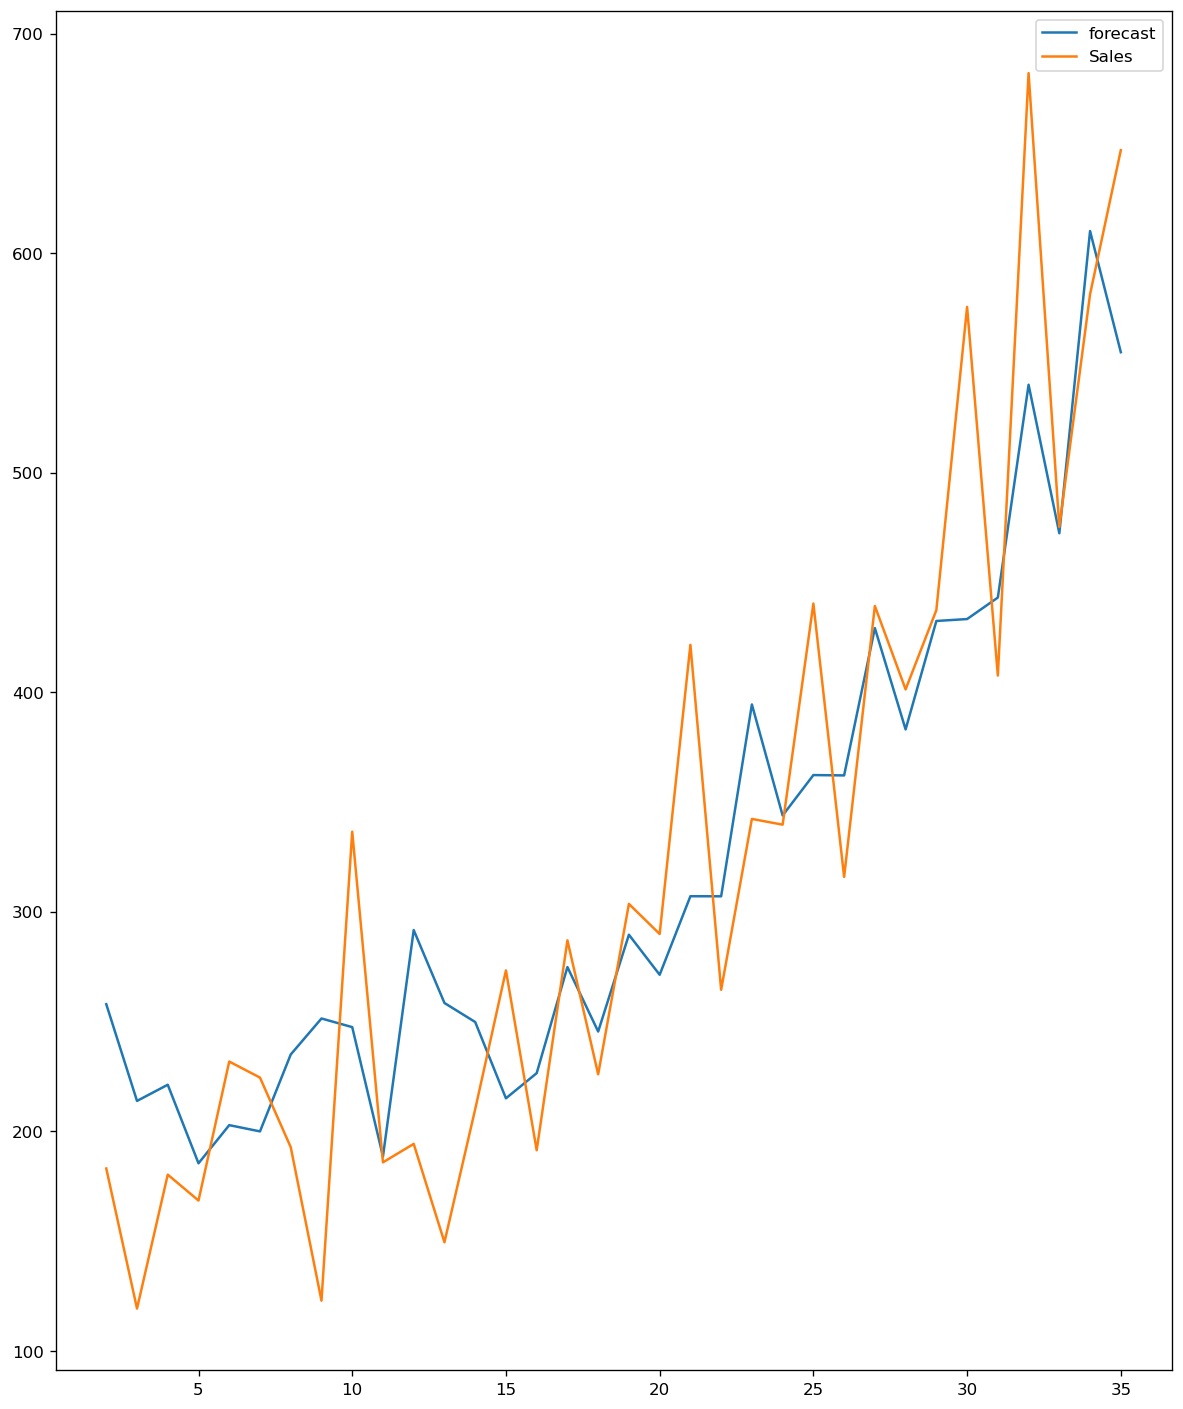

In [18]:
model1_fit1.plot_predict(dynamic=False)
plt.show()

In [42]:
output = model1_fit1.forecast()
output

(array([581.40808417]),
 array([66.62493354]),
 array([[450.82561396, 711.99055439]]))

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [43]:
model1_fit1.forecast(11) 
salida = model1_fit1.predict()
#salida1 = salida.fit()
salida

2     112.027581
3      30.773181
4     101.939497
5       5.163686
6      34.340193
7     -31.809748
8      10.523822
9      58.616955
10    124.582585
11   -147.922268
12    105.781735
13     64.176762
14    100.312766
15      4.959878
16    -46.791391
17     83.448428
18    -41.518742
19     63.569158
20    -32.270462
21     17.201332
22   -114.532662
23    129.943766
24      1.581368
25     22.581195
26    -78.271250
27    113.326448
28    -56.225337
29     31.165819
30     -4.055148
31   -132.359083
32    132.465038
33   -209.580026
34    134.759161
35    -26.421330
dtype: float64

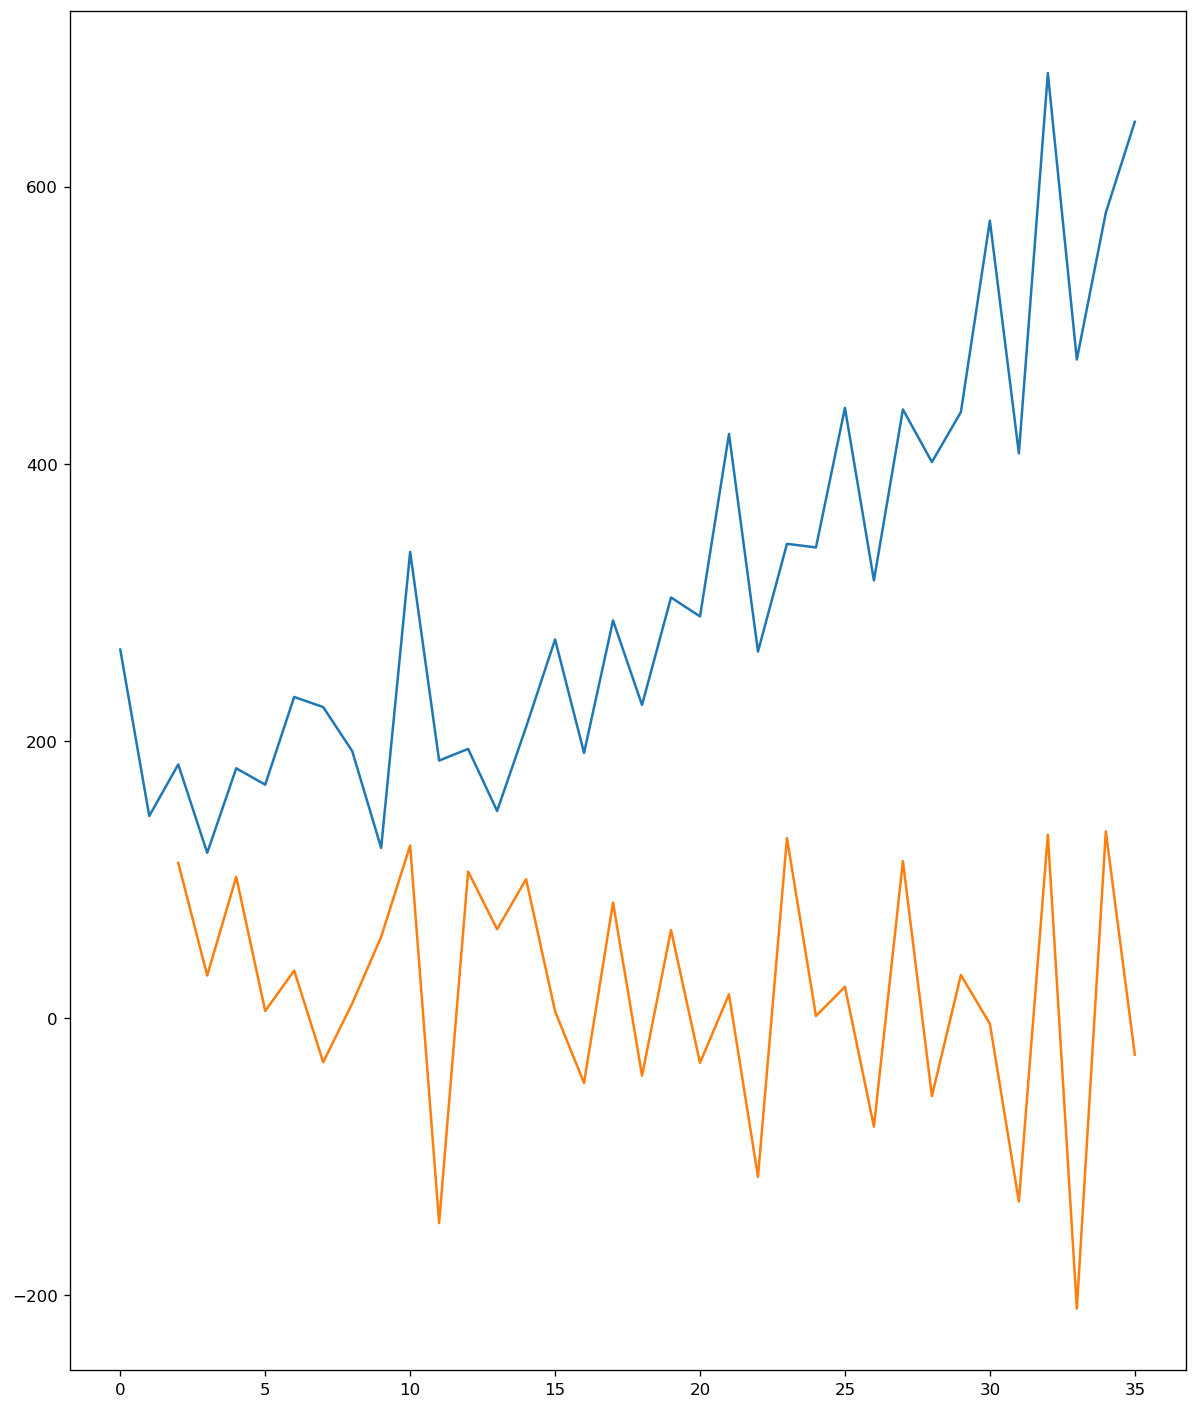

In [38]:
from matplotlib import pyplot
pyplot.plot(df['Sales'])
pyplot.plot(salida)

In [20]:
train_size = int(df.shape[0]*0.7)


In [21]:
train, test =  df.Sales[0:train_size], df.Sales[train_size:]

In [22]:
test.shape

(11,)

In [23]:
data = train
predict = []
for t in test:
    model = ARIMA(data,order=(1,1,1))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


316.96044577493035


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


321.90251872653874
359.5662383257234
371.2748344304027
410.77502799552775
417.8387474203767
441.257956120585
512.8822985758682
462.9546460594875
617.1884238225454
551.3502009482556


In [24]:
predict

[316.96044577493035,
 321.90251872653874,
 359.5662383257234,
 371.2748344304027,
 410.77502799552775,
 417.8387474203767,
 441.257956120585,
 512.8822985758682,
 462.9546460594875,
 617.1884238225454,
 551.3502009482556]

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values,predict)
mse

8036.554778925643

In [26]:
fc, se, conf = model1_fit1.forecast(11,alpha=0.05)

In [27]:
fc_series = pd.Series(fc,index=test.index)
lower_series = pd.Series(conf[:,0],index=test.index)
upper_series = pd.Series(conf[:,1],index=test.index)

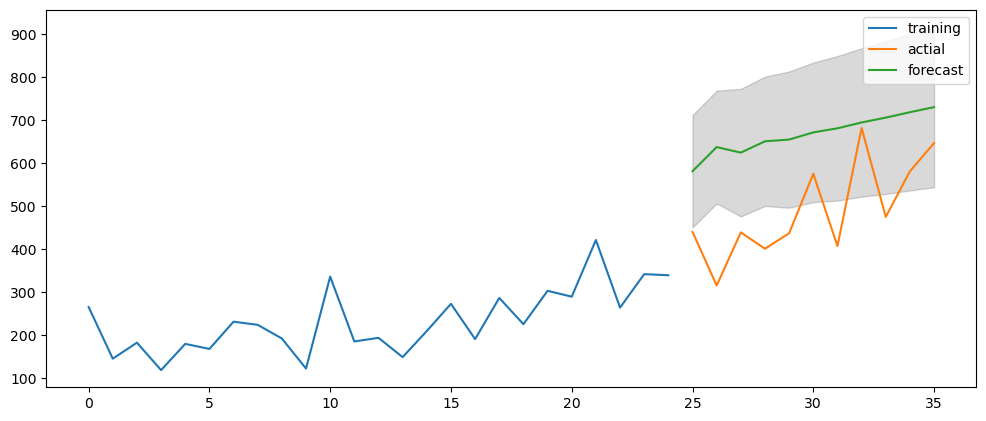

In [28]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train,label='training')
plt.plot(test,label='actial')
plt.plot(fc_series,label='forecast')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k', alpha=.15)
plt.legend()
plt.show()

In [31]:
import pmdarima as pm
model_auto = pm.auto_arima(df.Sales,start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,
                          d=None,seasonal=False,start_P=0, D=0, trace=True, error_action='ignore',
                          suppress_warnings=True,stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.221 seconds
                               SARIMAX Results             